<a href="https://colab.research.google.com/github/aloureiro96/Ising-Model/blob/main/1D_ising_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python matplotlib numpy


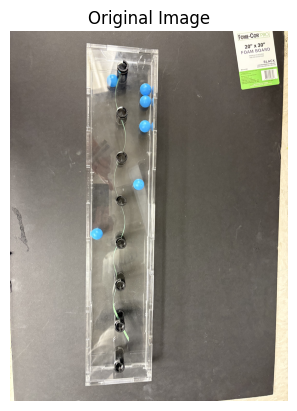

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (make sure the path is correct)
img = cv2.imread('IMG_2100.jpeg')

# Convert BGR to RGB (OpenCV loads images in BGR format)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Original Image')
plt.show()


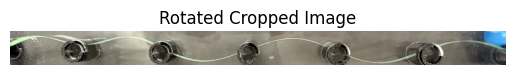

In [117]:
# Crop region: img[y1:y2, x1:x2]
cropped = img_rgb[700:4400, 1550:1800]
cropped = cv2.rotate(cropped, cv2.ROTATE_90_CLOCKWISE)

plt.imshow(cropped)
plt.axis('off')
plt.title('Rotated Cropped Image')
plt.show()


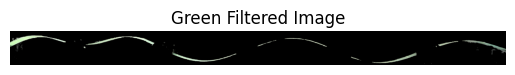

In [118]:
# Convert the rotated cropped image to HSV color space
hsv_image = cv2.cvtColor(cropped, cv2.COLOR_RGB2HSV)

# Define the lower and upper bounds for the green color in HSV
# These values might need to be adjusted based on the specific shade of green you want to detect
lower_green = np.array([40, 10, 10])  # Hue, Saturation, Value
upper_green = np.array([85, 255, 255])

# Create a mask to isolate the green color
mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Apply the mask to the original rotated cropped image
green_filtered_image = cv2.bitwise_and(cropped, cropped, mask=mask)

# Display the filtered image
plt.imshow(green_filtered_image)
plt.axis('off')
plt.title('Green Filtered Image')
plt.show()


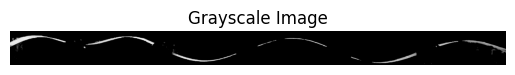

In [119]:
# Convert the green filtered image to grayscale
gray_image = cv2.cvtColor(green_filtered_image, cv2.COLOR_RGB2GRAY)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.show()

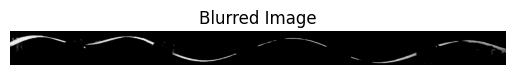

In [120]:
# Apply blur
blurred=cv2.GaussianBlur(gray_image,(5,5),0)
plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.title('Blurred Image')
plt.show()

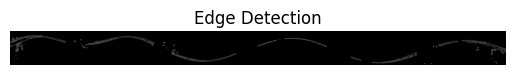

In [121]:
# Edge Detection
edges=cv2.Canny(blurred,30,10)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title('Edge Detection')
plt.show()

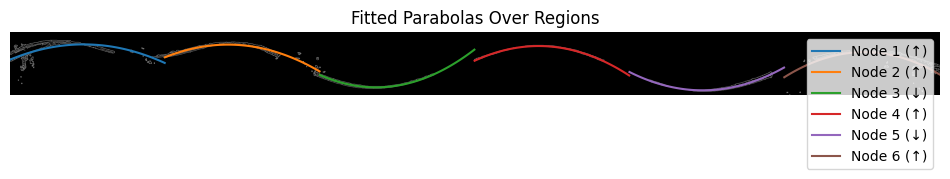

In [123]:
# Split image into vertical segments
height, width = edges.shape
num_regions = 6
region_width = width // num_regions

plt.figure(figsize=(12, 6))
plt.imshow(edges, cmap='gray')
plt.title('Fitted Parabolas Over Regions')
plt.axis('off')

# Loop through each region
for i in range(num_regions):
    x_start = i * region_width
    x_end = (i + 1) * region_width if i < num_regions - 1 else width

    # Extract edge points in this region
    region = edges[:, x_start:x_end]
    ys, xs = np.where(region != 0)

    # Adjust x-coordinates back to full image coords
    xs = xs + x_start

    if len(xs) > 20:  # Need enough points to fit
        # Fit a parabola: y = a*x^2 + b*x + c
        coeffs = np.polyfit(xs, ys, deg=2)
        a, b, c = coeffs

        # Generate fitted curve
        x_fit = np.linspace(x_start, x_end - 1, 100)
        y_fit = a * x_fit**2 + b * x_fit + c

        # Plot the fitted curve
        plt.plot(x_fit, y_fit, label=f'Node {i+1} ({"↑" if a>0 else "↓"})')

plt.legend()
plt.show()